In [102]:
using Plots

In [110]:
const mode = 2

include("src/low_level_bsplines.jl")
include("src/maxwell_1d_fem.jl")

eta1_min = .0
eta1_max = 2π
nc_eta1  = 128

Lx = eta1_max - eta1_min

delta_eta1 = Lx / nc_eta1

domain = [eta1_min, eta1_max]

deg = 3

maxwell_1d = Maxwell1DFEM(domain, nc_eta1, deg);

eig_weak_poisson = [0.0, 415.345, 104.087, 46.447, 26.2738, 16.9373, 11.8665, 8.80994, 6.82706, 5.46859, 4.49793, 3.78081, 3.23648, 2.814, 2.47995, 2.21165, 1.99332, 1.81366, 1.66444, 1.53953, 1.43432, 1.34527, 1.26963, 1.20525, 1.15043, 1.10382, 1.06432, 1.03105, 1.00331, 0.980502, 0.962173, 0.94794, 0.9375, 0.930612, 0.927087, 0.926784, 0.9296, 0.935465, 0.944339, 0.956208, 0.971079, 0.988977, 1.00994, 1.03401, 1.06125, 1.09169, 1.12536, 1.16228, 1.20242, 1.24569, 1.29195, 1.34095, 1.39235, 1.44567, 1.50026, 1.55532, 1.60986, 1.66274, 1.71266, 1.75823, 1.79801, 1.83066, 1.85495, 1.86994, 1.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [111]:
ex = zeros(Float64, nc_eta1)
ey = zeros(Float64, nc_eta1)
bz = zeros(Float64, nc_eta1)

bz_exact = zeros(Float64, nc_eta1)
ex_exact = zeros(Float64, nc_eta1)
ey_exact = zeros(Float64, nc_eta1)
rho      = zeros(Float64, nc_eta1)
sval     = zeros(Float64, nc_eta1)

cos_k(x) = cos(mode*2*pi*x/Lx) 
sin_k(x) = sin(mode*2*pi*x/Lx) 

# Test Poisson
#-------------
# Set exact solution
for i = 1:nc_eta1
   xi = eta1_min + (i-1)*delta_eta1
   ex_exact[i] = sin_k(xi)/(2.0*mode*pi/Lx)
end

x = range(eta1_min , stop=eta1_max, length=nc_eta1+1)[1:end-1] |> collect;

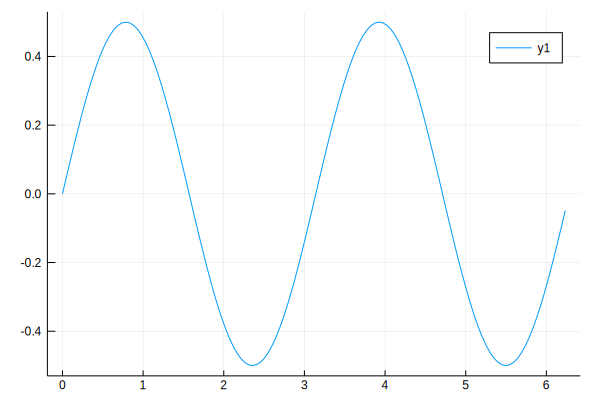

In [112]:
plot(x, ex_exact)

In [113]:
compute_rhs_from_function( maxwell_1d, cos_k, deg, rho)
rho

128-element Array{Float64,1}:
 0.04806690285067026 
 0.04689829575400749 
 0.045278032432017334
 0.04322171690621657 
 0.0407491526192151  
 0.03788415171673785 
 0.03465430572364448 
 0.03109071982246193 
 0.02722771329347277 
 0.023102489001285354
 0.018754775110910435
 0.014226442483814482
 0.009561101438634853
 ⋮                   
 0.027227713293472743
 0.03109071982246189 
 0.03465430572364445 
 0.03788415171673783 
 0.040749152619215086
 0.04322171690621656 
 0.04527803243201731 
 0.04689829575400748 
 0.04806690285067024 
 0.04877259939683915 
 0.04900858914900161 
 0.048772599396839166

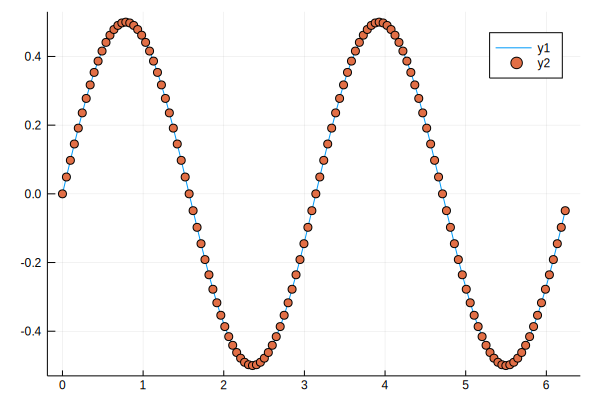

In [114]:
compute_e_from_rho( maxwell_1d, ex, rho )
sval =  eval_uniform_periodic_spline_curve(deg-1, ex)
plot(x, sval)
scatter!(x, ex_exact)